# DAT257x: Reinforcement Learning Explained

## Lab 2: Bandits

### Exercise 2.4 Thompson Beta

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

Now let's implement a Thompson Beta algorithm. 



In [27]:
import scipy.special
#Tompson Beta policy
class ThompsonBeta(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        #PRIOR Hyper-params: successes = 1; failures = 1
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
        self.name = "Thompson Beta"
        
        #For each arm, maintain success and failures
        self.successes = np.ones(num_actions, dtype = np.int)
        self.failures = np.ones(num_actions, dtype = np.int)
        self.rng = list(range(num_actions))
        print(self.rng)
        
    def act(self):
        """Sample beta distribution from success and failures"""
        """Play the max of the sampled values"""
#         print(self.successes)
#         print(self.failures)
        betas = list(map(lambda i: scipy.special.beta(self.successes[i], self.failures[i]), self.rng))
#         print(betas)
        current_action = np.argmax(betas)
        return current_action
    
    def feedback(self, action, reward):
        if reward > 0:
            self.successes[action] += 1
        else:
            self.failures[action] += 1
        self.total_counts[action] += 1

Now let's prepare the simulation. 

In [25]:
evaluation_seed = 1239
num_actions = 10
# trials = 15
trials = 10000
distribution = "bernoulli"


What do you think the regret graph would look like?

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal arm: 4


<Figure size 720x360 with 0 Axes>

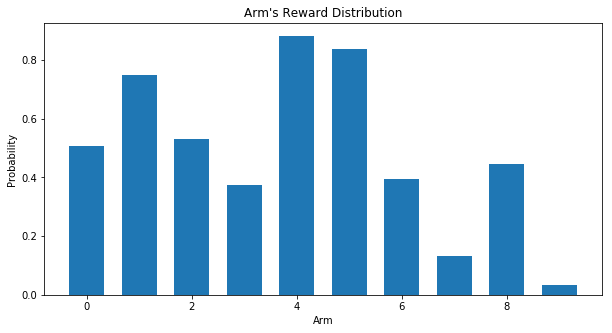

--------------------------------------------------
Policy: Thompson Beta 
Average Reward: 0.3898 
Average Regret: 0.48627915332823024
Arm pulls: [ 622.  770.  622.  662. 1059.  921.  638. 1065.  634. 3007.]


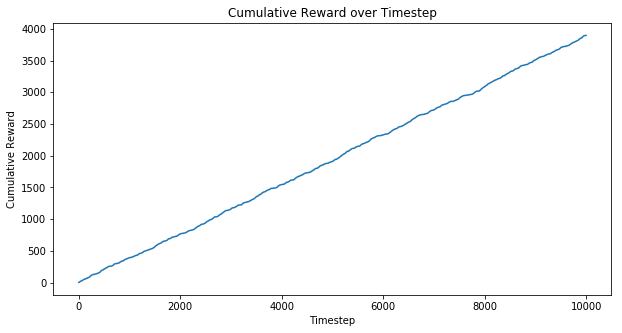

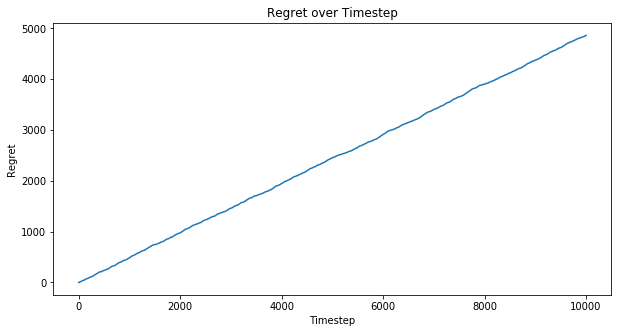

In [28]:
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = ThompsonBeta(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Now let's prepare another simulation by setting a different distribution, that is set distribion = "normal"

Run the simulation and observe the results.

What do you think the regret graph would look like?